# Neural & Behavioral Modeling - Week 9 (Exercises)
by 林子堯 (r08227112@ntu.edu.tw)

In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 A Two-layered Linear Network as a Regression Model (7 points)
Data fitting of the following network is poor. Please check if adding bias terms or chaging network hyperparameters (e.g., learning rate, amount of training, etc.) help. If not, please explain why the fitting is poor given that the network/regression model has sufficient degrees of freedom (i.e., network weights or regression coefficients) to overfit such a small data set.

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.679 -0.   ]
 [ 0.679  0.   ]
 [ 1.357  0.   ]
 [-0.     0.643]
 [ 0.     0.643]
 [ 0.     1.286]]


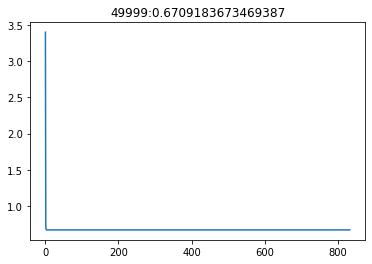

In [15]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix

eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
#===================
print(X @ W.T) # predicted Y
#===================

從上方老師的範例中，令 input $x_i^k, \; i = 1, \dots, 4$； ouput $y_j^k, \; j = 1, 2$，而觀察值則以 $k$ 來表示，$k = 1, \dots, 6$ 。而此 two-layer linear network 的模型可表示為

$$
y_j^k = \boldsymbol{{x^k}^{\top} w_j} = \sum_{i=1}^4 x_i^k w_{ij} 
$$

寫成矩陣的形式 (可能比較好理解，對我來說啦)

$$
\begin{align}
&\boldsymbol{Y} = \boldsymbol{X W} \\
\Rightarrow \quad &\begin{pmatrix} \vdots & \vdots \\  y_1^k & y_2^k \\ \vdots & \vdots \end{pmatrix} = 
\begin{pmatrix} \vdots & \vdots & \vdots & \vdots \\  x_1^k & x_2^k & x_3^k & x_4^k\\ \vdots & \vdots & \vdots & \vdots \end{pmatrix}\begin{pmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \\ w_{41} & w_{42} \end{pmatrix}
\end{align}
$$

若如果我們的模型加入偏權值 (bias parameter $b_j, \; j = 1, 2$)，則模型只是多加兩個參數在之中

$$
\begin{align}
&y_j^k = \sum_{i=1}^4 x_i^k w_{ij} + b_j \\
\Rightarrow \quad &\boldsymbol{Y} = \boldsymbol{X W + 1 B} \\
\Rightarrow \quad &\begin{pmatrix} \vdots & \vdots \\  y_1^k & y_2^k \\ \vdots & \vdots \end{pmatrix} = 
\begin{pmatrix} \vdots & \vdots & \vdots & \vdots \\  x_1^k & x_2^k & x_3^k & x_4^k\\ \vdots & \vdots & \vdots & \vdots \end{pmatrix}
\begin{pmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \\ w_{41} & w_{42} \end{pmatrix} +
\begin{pmatrix} \vdots \\ 1 \\ \vdots \end{pmatrix} \begin{pmatrix} b_1 & b_2 \end{pmatrix}
\end{align}
$$

我們假設 loss function 為 $Q(\boldsymbol{W}, \boldsymbol{B}) = \frac{1}{2}(t_j^k-y_j^k)^2 = \frac{1}{2}(t_j^k-(\sum_{i=1}^3 x_i^k w_{ij} + b_j))^2$，其中 $t_j^k$ 為真實值、$y_j^k$ 為預測值 (output)，且每次以一筆資料來做參數的更新的話。我們可分別求得 $w_{ji}$ 與 $b_j$ 的梯度為

$$
\begin{cases}
\frac{\partial Q}{\partial w_{ji}} = (t_j^k-y_j^k) x_i^k\\
\frac{\partial Q}{\partial b_j} = t_j^k-y_j^k
\end{cases}
$$

在做 gradient descent 時，我們跟新參數的大小除了會和上式所求的反方向外，還會乘以一常數 $\eta$ 做為學習率。因此 $w_{ji}$ 與 $b_j$ 每次更新的幅度為

$$
\begin{cases}
\Delta w_{ji} = \eta (t_j^k-y_j^k) x_i^k \\
\Delta b_j = \eta (t_j^k-y_j^k)
\end{cases}
$$

下方 code 為嘗試加入偏權值的結果。

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.811  0.189]
 [ 0.792  0.208]
 [ 1.113 -0.113]
 [ 0.17   0.83 ]
 [ 0.189  0.811]
 [-0.132  1.132]]


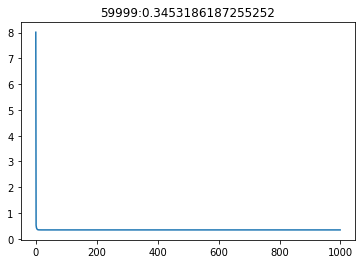

In [16]:
### Write your codes with bias terms here

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#===================
B=random.rand(Ny) # adding bias terms
#===================

eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=60000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose a traing pattern at random
    
    # Forward propagation:
    #===================
    y=W.dot(X[p]) + B
    #===================

    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    #===================
    deltaB = eta * (Y[p] - y)
    B = B + deltaB
    #===================

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        #===================
        predY=W.dot(X.T) + outer(B, ones(Np)) # testing ALL the training samples
        #===================
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
#===================
print(X @ W.T + B) # predicted Y
#===================

加入偏權值後，可發現其 sum of sqaured error 比起先前的要來的少，但還是無法達到 overfitting 的結果。且在這兩種模型下，不管怎麼改變 learning rate 還是 amound of training 的數值，其結果依舊沒有改善。

###  Write your discussions here, if any

在第一個 two-layer linear network 模型中，我們模型的參數 $\boldsymbol{W} = (w_{ji})_{4 \times 2}$ 「表面上」的數量為 8 個 (如果考量偏權值 $\boldsymbol{B} = (b_1, b_2)$ 的話則有 10 個參數)，而我們的觀測資料則只有 6 筆，看似參數的自由度應該使足夠應付資料限制是的數量。但是！實際上 $\boldsymbol{Y} = (\boldsymbol{Y_1, Y_2})$ 中，$\boldsymbol{Y_1}$ 與 $\boldsymbol{Y_2}$ 是正交的 (orthogonal)，我們的模型實際上是可以拆成兩個獨立的方程式：

$$
\begin{pmatrix} y_1^1 \\ \vdots \\ y_1^6 \end{pmatrix} = 
\begin{pmatrix} x_1^1 & x_2^1 & x_3^1 & x_4^1 \\ \vdots & \vdots & \vdots & \vdots \\ x_1^6 & x_2^6 & x_3^6 & x_4^6 \end{pmatrix}\begin{pmatrix} w_{11} \\ w_{21} \\ w_{31} \\ w_{41} \end{pmatrix}
\quad and \quad
\begin{pmatrix} y_2^1 \\ \vdots \\ y_2^6 \end{pmatrix} = 
\begin{pmatrix} x_1^1 & x_2^1 & x_3^1 & x_4^1 \\ \vdots & \vdots & \vdots & \vdots \\ x_1^6 & x_2^6 & x_3^6 & x_4^6 \end{pmatrix}\begin{pmatrix} w_{12} \\ w_{22} \\ w_{32} \\ w_{42} \end{pmatrix}
$$

這兩組方程式分別都是只有 4 個參數，卻有 6 條觀測資料的獨立限制式。此種情況在模型參數的辨識上稱為「過度認定」(over-identified)，也就是說未知參數的個數剛多於線性獨立的方程式個數，對於代數求解的問題中是「無解」的，因此基本上是無法使 loss function 剛好會等於 0。換句話說在此情境是無法剛好使預測值與真實值完全相同 (擬合 fit) 啦。即便有偏權值的加入，也是得到相同的結果，原因如上敘述。

因此老師在題目敘述中 "... the network/regression model has sufficient degrees of freedom (i.e., network weights or regression coefficients) to overfit such a small data set" 其實怪怪的，此模型對於此筆資料下應該是沒有充足的 degree of freedom，也應當不會產生 overfitting 的問題。


另外，我們也可以從兩個方面來探討此 linear network (model) 在此筆資料的問題：

第一：我們可以觀察 $X$ 與 $Y_1$ 前三筆資料

$$
\begin{cases}
w_{11} 1 + w_{21} 0 + w_{31} 0 + w_{41} 0 = 1 \\
w_{11} 0 + w_{21} 1 + w_{31} 0 + w_{41} 0 = 1 \\
w_{11} 1 + w_{21} 1 + w_{31} 0 + w_{41} 0 = 1 
\end{cases}
$$

照理說線性模型本來預設，當 $x_i^k$ 加入後，$y_1^k$ 應該得增加 $w_{k1}$ 倍，但是我們從第三列與第一列的差別在於差了 $w_{21} 1 = 1 - 1 = 0$，然而第二列卻是 $w_{21} = 1$ 與之矛盾，表示 $x_i$'s 之間並不是完全的線性組合。

第二：因為題目做的是 linear regression model 的原因，本質上很自然而然的我會認為 $\boldsymbol{Y}$ 應是連續變項，只是剛好今觀測的值皆為 0 和 1 而已，至於模型擬合不好的原因在前述都討論過了。但如果 $\boldsymbol{Y}$ 如是二分類別變項的話，那也就不應該是使用 linear regression model 阿，畢竟 $\boldsymbol{Y}$ 的值域只有 $\{0, 1\}$，而我們預測值 $XW$ 的值域是屬於 $(-\infty, \infty)$ 根本沒有對應到，因此用， linear regression model 本來就不是合處此類問題。對於改善的方法可以

- Logistic regression 或是老師在 09_examples.ipynb 的



## 2 PyTorch (3 points)
Read <a href="https://www.pytorchtutorial.com/pytorch-for-numpy-users/">this tutorial</a> first and port the following Instar Learning from NumPy to PyTorch:

In [ ]:
# Instar learning:

# =================
random.seed(999)
# =================
x=array([0.1,0.3,0.6])
W=random.rand(3)
for i in range(10): # trials 
    y=dot(W,x) 
    W+=y*(x-W) # postsynaptically gated InStar 
    print(W,y)

下方 code 是用 PyTorch 來實現上方的程式碼。

In [51]:
### Write your PyTorch codes here
import torch as t

# =================
t.manual_seed(999)
# =================
x = t.tensor([0.1, 0.3, 0.6])
W = t.rand(3)
for i in t.arange(10):
    y = t.dot(W, x)
    W += y * (x - W)
    print(W, y)

tensor([0.5094, 0.5503, 0.2071]) tensor(0.2911)
tensor([0.3701, 0.4651, 0.3408]) tensor(0.3403)
tensor([0.2672, 0.4022, 0.4395]) tensor(0.3810)
tensor([0.1985, 0.3602, 0.5055]) tensor(0.4111)
tensor([0.1560, 0.3342, 0.5463]) tensor(0.4312)
tensor([0.1312, 0.3190, 0.5701]) tensor(0.4436)
tensor([0.1171, 0.3105, 0.5836]) tensor(0.4509)
tensor([0.1093, 0.3057, 0.5911]) tensor(0.4550)
tensor([0.1051, 0.3031, 0.5951]) tensor(0.4573)
tensor([0.1027, 0.3017, 0.5974]) tensor(0.4585)
